<a href="https://colab.research.google.com/github/AnkitaDasData/AnalyticsHub/blob/main/Projects/LLM_with_Semantic_Search/Keyword_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keyword Search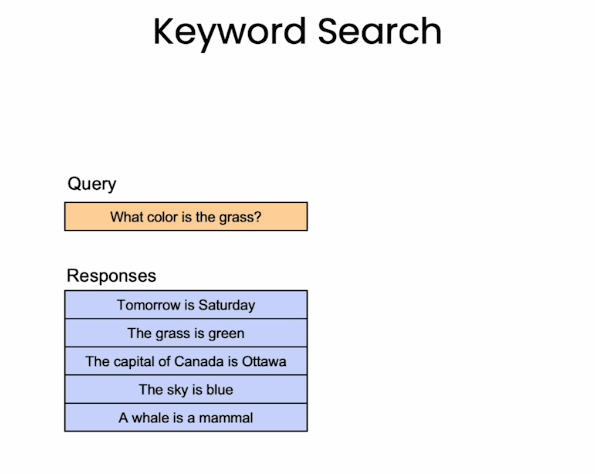

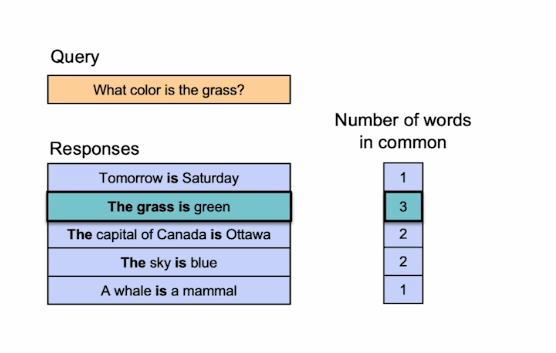

## Setup

Load needed API keys and relevant Python libaries.

In [ ]:
# Step 1: Install the Weaviate client library
#!pip install cohere
#!pip install weaviate-client --upgrade

##!pip install python-dotenv

In [ ]:
# Step 2: Import necessary libraries
import weaviate
import os
from dotenv import load_dotenv, find_dotenv


In [ ]:
# Step 3: Set up the connection to the Weaviate instance (no API key)
# Set the API key
# Set your API key here
os.environ['WEAVIATE_API_KEY'] = '76320a90-53d8-42bc-b41d-678647c6672e'

# Initialize client with your API key
client = weaviate.Client(
    url="https://cohere-demo.weaviate.network",
    auth_client_secret=weaviate.AuthApiKey(api_key=os.getenv('WEAVIATE_API_KEY'))
)

# Example query (replace "YourClassName" and fields with the relevant class and fields)
result = client.query.get("YourClassName", ["field1", "field2"]).do()

print(result)

<ipython-input-3-00ee42ad6250>:7: DeprecationWarning: 
Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
            be removed by 2024-11-30.

            Upgrade your code to use Python client v4 `weaviate.WeaviateClient` connections and methods.
                - For Python Client v4 usage, see: https://weaviate.io/developers/weaviate/client-libraries/python
                - For code migration, see: https://weaviate.io/developers/weaviate/client-libraries/python/v3_v4_migration

            If you have to use v3 code, install the v3 client and pin the v3 dependency in your requirements file: `weaviate-client>=3.26.7;<4.0.0`
  client = weaviate.Client(


{'errors': [{'locations': [{'column': 6, 'line': 1}], 'message': 'Cannot query field "YourClassName" on type "GetObjectsObj".', 'path': None}]}


Let's start by imporing Weaviate to access the Wikipedia database.

In [ ]:
client.is_ready()

True

# Keyword Search

In [ ]:
def keyword_search(query,
                   results_lang='en',
                   properties = ["title","url","text"],
                   num_results=3):

    where_filter = {
    "path": ["lang"],
    "operator": "Equal",
    "valueString": results_lang
    }

    response = (
        client.query.get("Articles", properties)
        .with_bm25(
            query=query
        )
        .with_where(where_filter)
        .with_limit(num_results)
        .do()
        )

    result = response['data']['Get']['Articles']
    return result

In [ ]:
query = "What is the most viewed televised event?"

# Looking up the search item
keyword_search_results = keyword_search(query)
print(keyword_search_results)

#list of dictionaries based on atleast 1 key word repeated in document
#not the best

[{'text': 'The most active Gamergate supporters or "Gamergaters" said that Gamergate was a movement for ethics in games journalism, for protecting the "gamer" identity, and for opposing "political correctness" in video games and that any harassment of women was done by others not affiliated with Gamergate. They argued that the close relationships between journalists and developers demonstrated a conspiracy among reviewers to focus on progressive social issues. Some supporters pointed to what they considered disproportionate praise for games such as "Depression Quest" and "Gone Home", which feature unconventional gameplay and stories with social implications, while they viewed traditional AAA games as downplayed. False claims of the "ethics in game journalism" had started as early as 2012, when Geoff Keighley was accused of such unethical behavior when he was presenting information about "Halo 4" among advertisements for Mountain Dew and Doritos, an event called "Doritosgate" in the gam

### Try modifying the search options
- Other languages to try: `en, de, fr, es, it, ja, ar, zh, ko, hi`

In [ ]:
properties = ["text", "title", "url",
             "views", "lang"]



In [ ]:
def print_result(result):
    """ Print results with colorful formatting """
    for i,item in enumerate(result):
        print(f'item {i}')
        for key in item.keys():
            print(f"{key}:{item.get(key)}")
            print()
        print()

In [ ]:
print_result(keyword_search_results)

item 0
text:The most active Gamergate supporters or "Gamergaters" said that Gamergate was a movement for ethics in games journalism, for protecting the "gamer" identity, and for opposing "political correctness" in video games and that any harassment of women was done by others not affiliated with Gamergate. They argued that the close relationships between journalists and developers demonstrated a conspiracy among reviewers to focus on progressive social issues. Some supporters pointed to what they considered disproportionate praise for games such as "Depression Quest" and "Gone Home", which feature unconventional gameplay and stories with social implications, while they viewed traditional AAA games as downplayed. False claims of the "ethics in game journalism" had started as early as 2012, when Geoff Keighley was accused of such unethical behavior when he was presenting information about "Halo 4" among advertisements for Mountain Dew and Doritos, an event called "Doritosgate" in the ga

In [ ]:
query = "What is the most viewed televised event?"
keyword_search_results = keyword_search(query, results_lang='de')
print_result(keyword_search_results)

item 0
text:Das nächste Album "Extinction Level Event: The Final World Front", dessen Titel vom Film "Deep Impact" inspiriert war, enthielt die Single "Gimme Some More", die im Januar 1999 Platz 5 der britischen Charts belegte. Mit Janet Jackson sang er außerdem den Erfolgshit "What’s It Gonna Be?!"

title:Busta Rhymes

url:https://de.wikipedia.org/wiki?curid=238582


item 1
text:Der Begriff Strukturalismus ist vom Wort Struktur abgeleitet und wurde vereinzelt seit Mitte des 19. Jahrhunderts verwendet. In der Psychologie wurde er 1907 von James Rowland Angell in einem Aufsatz über Edward Bradford Titchener eingeführt. In der Sprach- und Literaturwissenschaft wurde er seit den 1920er vom Prager linguistischen Kreis verwendet. Dort knüpfte Roman Jakobson an die Schule des Russischen Formalismus an und verwendete den Begriff „Strukturalismus“ erstmals 1929 in einem in der Prager Zeitschrift "Čin" auf Tschechisch unter dem Titel "Romantischer Panslawismus – neue Slawistik" ("Romantické vše

In [ ]:
# Frequency of keywords is also maintained

## How to get your own API key

For this course, an API key is provided for you.  If you would like to develop projects with Cohere's API outside of this classroom, you can register for an API key [here](https://dashboard.cohere.ai/welcome/register?utm_source=partner&utm_medium=website&utm_campaign=DeeplearningAI).